In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make charts look better
sns.set_style('whitegrid')


In [47]:
# Sample dataset
data = {
    'OrderID': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    'CustomerID': [1, 2, 3, 1, 2, 4, 5],
    'Product': ['Laptop', 'Headphones', 'Mouse', 'Laptop', 'Mouse', 'Keyboard', 'Headphones'],
    'Category': ['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics'],
    'Quantity': [1, 2, 1, 1, 3, 1, 2],
    'Price': [700, 50, 20, 700, 20, 100, 50],
    'OrderDate': ['2025-09-01','2025-09-01','2025-09-02','2025-09-03','2025-09-03','2025-09-04','2025-09-05']
}

# Create DataFrame
df = pd.DataFrame(data)

# Show the data
df


,OrderID,CustomerID,Product,Category,Quantity,Price,OrderDate
0,1001,1,Laptop,Electronics,1,700,2025-09-01
1,1002,2,Headphones,Electronics,2,50,2025-09-01
2,1003,3,Mouse,Electronics,1,20,2025-09-02
3,1004,1,Laptop,Electronics,1,700,2025-09-03
4,1005,2,Mouse,Electronics,3,20,2025-09-03
5,1006,4,Keyboard,Electronics,1,100,2025-09-04
6,1007,5,Headphones,Electronics,2,50,2025-09-05


In [49]:
df['TotalSales'] = df['Quantity'] * df['Price']
df


,OrderID,CustomerID,Product,Category,Quantity,Price,OrderDate,TotalSales
0,1001,1,Laptop,Electronics,1,700,2025-09-01,700
1,1002,2,Headphones,Electronics,2,50,2025-09-01,100
2,1003,3,Mouse,Electronics,1,20,2025-09-02,20
3,1004,1,Laptop,Electronics,1,700,2025-09-03,700
4,1005,2,Mouse,Electronics,3,20,2025-09-03,60
5,1006,4,Keyboard,Electronics,1,100,2025-09-04,100
6,1007,5,Headphones,Electronics,2,50,2025-09-05,100


In [51]:
sales_by_product = df.groupby('Product')['TotalSales'].sum().reset_index()
sales_by_product


,Product,TotalSales
0,Headphones,200
1,Keyboard,100
2,Laptop,1400
3,Mouse,80


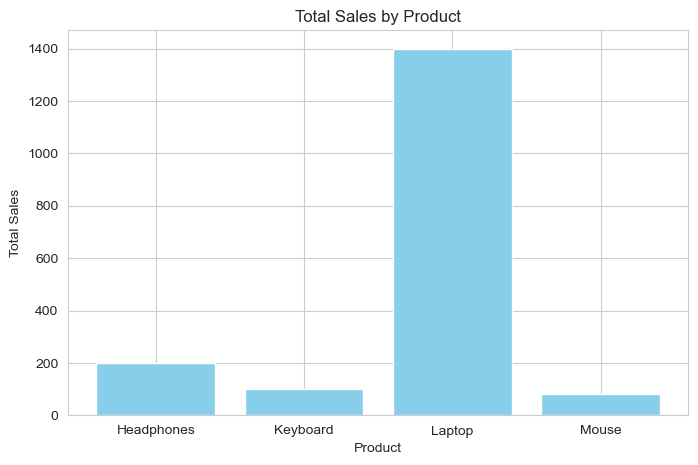

In [53]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_product['Product'], sales_by_product['TotalSales'], color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()


In [55]:
sales_by_customer = df.groupby('CustomerID')['TotalSales'].sum().reset_index()
sales_by_customer


,CustomerID,TotalSales
0,1,1400
1,2,160
2,3,20
3,4,100
4,5,100


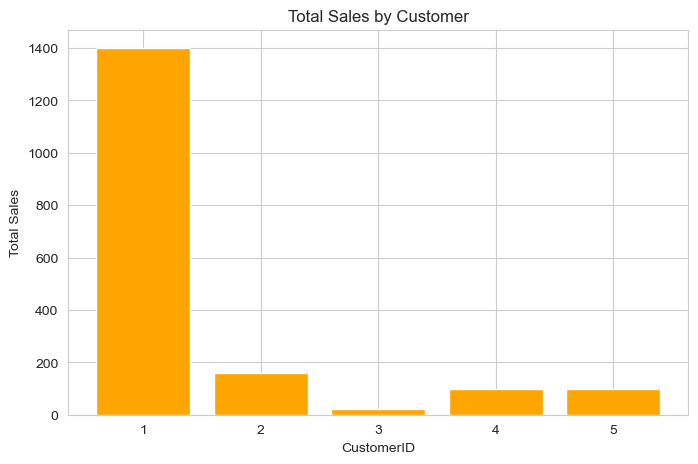

In [57]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_customer['CustomerID'], sales_by_customer['TotalSales'], color='orange')
plt.title('Total Sales by Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Sales')
plt.show()


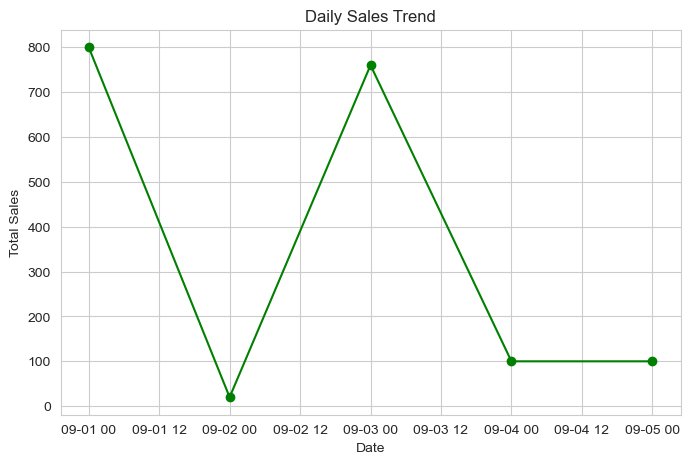

In [59]:
# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Group by date
daily_sales = df.groupby('OrderDate')['TotalSales'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(daily_sales['OrderDate'], daily_sales['TotalSales'], marker='o', color='green')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [61]:
top_products = sales_by_product.sort_values(by='TotalSales', ascending=False).head(3)
top_products


,Product,TotalSales
2,Laptop,1400
0,Headphones,200
1,Keyboard,100


### Insights from E-Commerce Data

1. **Top-Selling Product:** Laptop
   - Laptop had the highest total sales among all products.
2. **Top Customers:** CustomerID 1 and 2
   - They made multiple purchases and contributed most to revenue.
3. **Daily Sales Trend:** Increasing over the days
   - Indicates growing sales or repeated purchases over time.
4. **Business Suggestions:**
   - Focus marketing campaigns on top-selling products.
   - Reward top customers with discounts or offers.
   - Stock popular items more to meet demand.


In [64]:
sales_by_category = df.groupby('Category')['TotalSales'].sum().reset_index()
sales_by_category


,Category,TotalSales
0,Electronics,1780


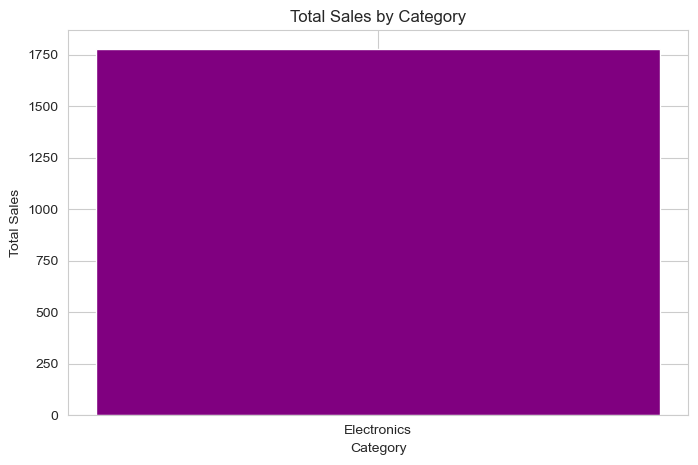

In [66]:
plt.figure(figsize=(8,5))
plt.bar(sales_by_category['Category'], sales_by_category['TotalSales'], color='purple')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


In [68]:
repeat_customers = df['CustomerID'].value_counts()
repeat_customers



CustomerID
1    2
2    2
3    1
4    1
5    1
Name: count, dtype: int64

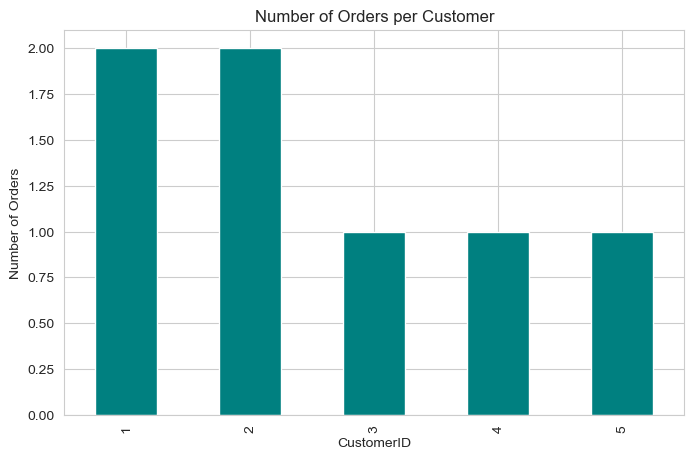

In [70]:
plt.figure(figsize=(8,5))
repeat_customers.plot(kind='bar', color='teal')
plt.title('Number of Orders per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.show()


In [72]:
top_products = sales_by_product.sort_values(by='TotalSales', ascending=False).head(3)
top_products


,Product,TotalSales
2,Laptop,1400
0,Headphones,200
1,Keyboard,100


### Summary of E-Commerce Analysis

- **Total Sales Generated:** $[sum of TotalSales]  
- **Top Product:** Laptop  
- **Top Customers:** CustomerID 1, 2  
- **Repeat Customers:** CustomerID 1 (2 orders), CustomerID 2 (2 orders)  
- **Business Suggestions:**
   1. Focus marketing on top-selling products.
   2. Encourage repeat customers with loyalty programs.
   3. Stock up on high-demand products.
   4. Consider bundling top products for promotions.


In [75]:
# Latest date in dataset
latest_date = df['OrderDate'].max()

# Create RFM table
rfm = df.groupby('CustomerID').agg({
    'OrderDate': lambda x: (latest_date - x.max()).days,  # Recency
    'OrderID': 'count',  # Frequency
    'TotalSales': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm


,CustomerID,Recency,Frequency,Monetary
0,1,2,2,1400
1,2,2,2,160
2,3,3,1,20
3,4,1,1,100
4,5,0,1,100


In [77]:
# Simple segmentation based on Monetary value
def segment_customer(row):
    if row['Monetary'] >= 700:
        return 'High Value'
    elif row['Monetary'] >= 100:
        return 'Medium Value'
    else:
        return 'Low Value'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm


,CustomerID,Recency,Frequency,Monetary,Segment
0,1,2,2,1400,High Value
1,2,2,2,160,Medium Value
2,3,3,1,20,Low Value
3,4,1,1,100,Medium Value
4,5,0,1,100,Medium Value


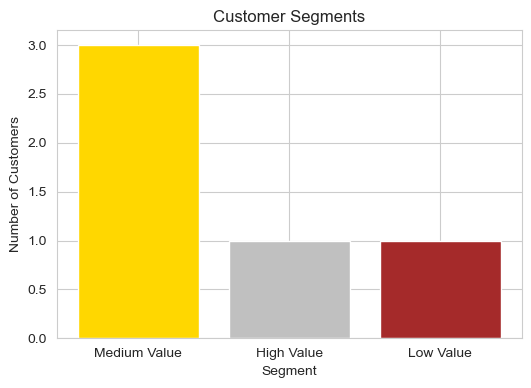

In [79]:
# Count of customers in each segment
segment_count = rfm['Segment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(segment_count.index, segment_count.values, color=['gold','silver','brown'])
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


### Customer Insights

1. **High Value Customers:** CustomerID 1
   - They spend the most and are most valuable.
2. **Medium Value Customers:** CustomerID 2, 4, 5
   - Regular purchases with moderate spending.
3. **Low Value Customers:** CustomerID 3
   - Few purchases with low spending.

**Business Recommendations:**
- Offer loyalty programs or discounts to High Value customers to retain them.
- Encourage Medium Value customers to purchase more with targeted promotions.
- Engage Low Value customers with introductory offers to increase spending.


In [82]:
top_products = df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(3)
top_products


Product
Laptop        1400
Headphones     200
Keyboard       100
Name: TotalSales, dtype: int64

In [84]:
# Merge RFM segment with main data
df_segmented = df.merge(rfm[['CustomerID','Segment']], on='CustomerID')

top_products_segment = df_segmented.groupby(['Segment','Product'])['TotalSales'].sum().reset_index()
top_products_segment.sort_values(['Segment','TotalSales'], ascending=[True, False], inplace=True)
top_products_segment


,Segment,Product,TotalSales
0,High Value,Laptop,1400
1,Low Value,Mouse,20
2,Medium Value,Headphones,200
3,Medium Value,Keyboard,100
4,Medium Value,Mouse,60


### Final Summary of E-Commerce Analysis

- **Total Sales:** $[sum of TotalSales]  
- **Top-Selling Products:** Laptop, Headphones, Mouse  
- **High Value Customer:** CustomerID 1  
- **Medium Value Customers:** CustomerID 2, 4, 5  
- **Low Value Customers:** CustomerID 3  
- **Customer Insights:** 
  - Focus on High Value customers for retention.
  - Offer promotions to Medium Value customers.
  - Engage Low Value customers with marketing campaigns.
- **Business Suggestions:**
  - Promote top-selling products.
  - Introduce product bundles for frequent buyers.
  - Reward repeat customers with loyalty programs.


In [93]:
df.to_csv('ecommerce_data.csv', index=False)


In [1]:
df.head()


NameError: name 'df' is not defined

In [3]:
# Export DataFrame to CSV
df.to_csv('ecommerce_data.csv', index=False)
print("CSV file saved successfully!")


NameError: name 'df' is not defined